In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from numba import njit

In [2]:
@njit
def glauber(s = np.array, hi = np.array, N = int):
    '''
    Runs the Glauber algorithm N times

    Input
    _____
    s : ndarray
        2D array with -1 for water and +1 for ice

    hi : ndarray
        2D array (same size as s) with standard normaly distributed values for ice / snow topography

    Output
    ______
    s : ndarray
        2D array with -1 for water and +1 for ice

    sums : ndarray
        array with the sum of s every 1_000_000 iterations 
    '''


    indices = np.arange(1, len(s)-1)
    sums = np.zeros(int(N/1_000_000))

    for i in range(N):
        x = np.random.choice(indices)
        y = np.random.choice(indices)

        sum_neighbors = s[x-1,y] + s[x+1,y] + s[x,y-1] + s[x,y+1]

        if sum_neighbors > 0:
            s[x,y] = +1
        elif sum_neighbors < 0:
            s[x,y] = -1
        else:
            if hi[x,y] >= 0:
                s[x,y] = +1
            else:
                s[x,y] = -1

        if (i%1_000_000) == 0:
            sums[int(i/1_000_000)] = np.sum(s) 
    
    return s, sums

In [3]:
# make a color map of fixed colors
cmap = colors.ListedColormap(['blue', 'white'])
bounds=[-100,0,100]
norm = colors.BoundaryNorm(bounds, cmap.N)

In [4]:
F_in = 0.48
size = 1000

# make random ice water configuration with F_in as fraction of water
s = np.ones(size**2)
s[:int(F_in * size**2)] = -1
np.random.shuffle(s)

s = s.reshape((size,size))
s[[0,-1],:] = 1
s[:,[0,-1]] = 1

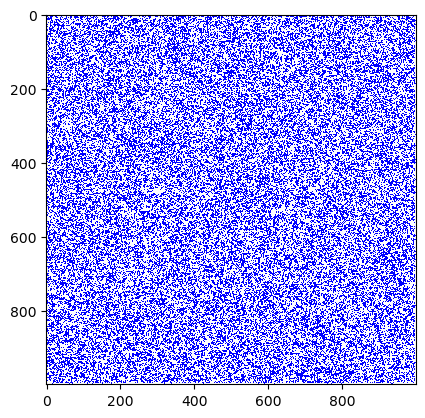

In [5]:
plt.imshow(s, cmap=cmap, norm=norm)

In [6]:
s_copy = s.copy()

In [7]:
# make random snowheight raster
hi = np.random.normal(loc = 0, scale = 1, size = (size, size))
#hi[300:310,:] = 5

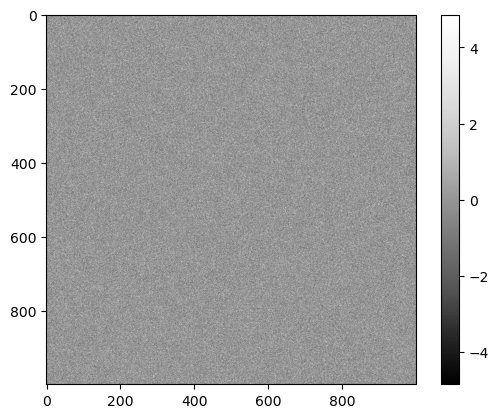

In [8]:
plt.imshow(hi, cmap= 'Greys_r')
plt.colorbar()

In [9]:
# run algorithm till stable state
ponds, sums = glauber(s, hi, 15_000_000)

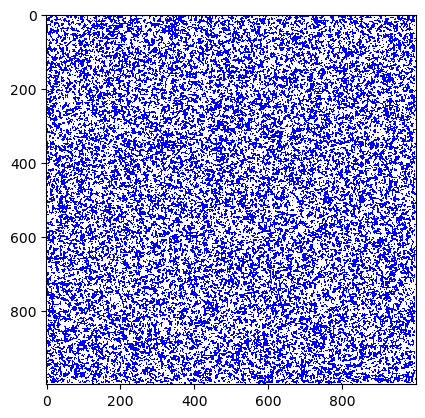

In [10]:
# plot ponds
plt.imshow(ponds, cmap=cmap, norm=norm)

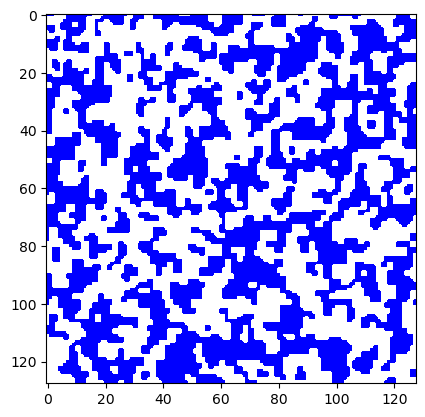

In [11]:
# zoom in
plt.imshow(ponds[100:228,100:228], cmap=cmap, norm=norm)

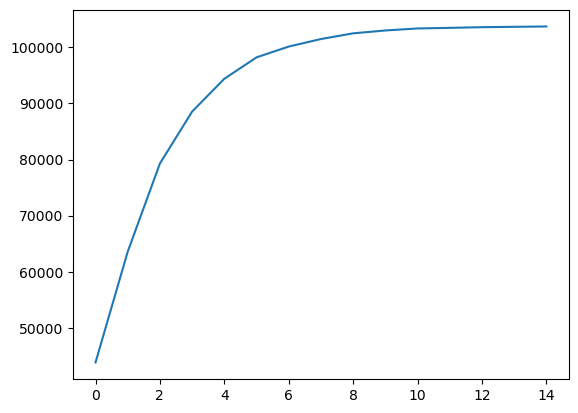

In [12]:
# check for stable state
plt.plot(sums)